In [211]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sunpy.coordinates import frames
import sunpy.map
from astropy import units as u 
import datetime
from sunpy.net import Fido, attrs as a
import numpy as np 
import warnings
import seaborn as sns
import scipy.stats
warnings.filterwarnings("ignore")

## Flare list data

In [85]:
flare_list = pd.read_csv("/Users/laurahayes/ml_project_flares/flare_analysis/goes_flare_list/final_flare_list.csv")
# flare_list = flare_list.set_index(pd.to_datetime(flare_list["event_starttime"]))
# flare_list.sort_index(inplace=True)
flare_list["event_starttime"] = pd.to_datetime(flare_list["event_starttime"])

# for flares in which cross midnight to next day
flare_list.loc[(pd.to_datetime(flare_list.event_endtime)<flare_list.event_starttime),'event_endtime']=pd.to_datetime(flare_list["event_endtime"]) + datetime.timedelta(days=1)
flare_list.loc[(pd.to_datetime(flare_list.event_peaktime)<flare_list.event_starttime),'event_peaktime']=pd.to_datetime(flare_list["event_peaktime"]) + datetime.timedelta(days=1)

flare_list = flare_list.drop_duplicates(subset="event_peaktime")

flare_list["noaa_ar"] = flare_list["noaa_ar"].replace(["\n","", "     "], 0)
flare_list["noaa_ar"] = flare_list["noaa_ar"].astype(int)

In [86]:
flare_list.keys()

Index(['event_starttime', 'event_peaktime', 'event_endtime', 'goes_class_ind',
       'goes_class', 'goes_class_val', 'integrated_flux', 'noaa_ar',
       'position_hgs', 'hgs_lat', 'hgs_lon', 'hpc_x', 'hpc_y'],
      dtype='object')

In [117]:
flare_list["matchtime"] = flare_list["event_starttime"].dt.strftime("%Y-%m-%dT00:00:00")

In [121]:
flare_list = flare_list[flare_list["noaa_ar"]!=0]

## AR data

In [246]:
tstart = "2010-01-01"
tend = "2010-01-31"

result = Fido.search(a.Time(tstart, tend), a.Instrument("SRS-Table"))

In [247]:
Fido.fetch(result, path="./")

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]
2010_SRS.tar.gz:   0%|          | 0.00/31.2k [00:00<?, ?B/s]
2010_SRS.tar.gz:   5%|▍         | 1.41k/31.2k [00:00<00:16, 1.84kB/s]
Files Downloaded: 100%|██████████| 1/1 [00:02<00:00,  2.70s/file]B/s]

Files Downloaded: 0file [00:00, ?file/s]                             


['20100101SRS.txt', '20100102SRS.txt', '20100103SRS.txt', '20100104SRS.txt', '20100105SRS.txt', '20100106SRS.txt', '20100107SRS.txt', '20100108SRS.txt', '20100109SRS.txt', '20100110SRS.txt', '20100111SRS.txt', '20100112SRS.txt', '20100113SRS.txt', '20100114SRS.txt', '20100115SRS.txt', '20100116SRS.txt', '20100117SRS.txt', '20100118SRS.txt', '20100119SRS.txt', '20100120SRS.txt', '20100121SRS.txt', '20100122SRS.txt', '20100123SRS.txt', '20100124SRS.txt', '20100125SRS.txt', '20100126SRS.txt', '20100127SRS.txt', '20100128SRS.txt', '20100129SRS.txt', '20100130SRS.txt', '20100131SRS.txt']

In [245]:
ls

20110101SRS.txt             flare_duration_cme_c5.png
20110102SRS.txt             get_ar_data.py
2011_SRS.tar.gz             merging_lists.py
active_region_flares.ipynb  test_hmi.png
all_ar_2010-2020.csv        testy.png
cme_flare_first_pass.ipynb


In [122]:
ar_data = pd.read_csv("all_ar_2010-2020.csv")

In [123]:
ar_data["matchtime"] = ar_data["event_starttime"]
ar_data["noaa_ar"] = ar_data["ar_noaanum"]

In [124]:
ar_data.head()

,ar_noaanum,event_starttime,event_endtime,hpc_x,hpc_y,hgs_x,hgs_y,hgc_x,hgc_y,frm_humanflag,frm_name,frm_daterun,ar_mtwilsoncls,ar_mcintoshcls,SOL_standard,ar_numspots,area_atdiskcenter,area_unit,matchtime,noaa_ar
0,11039,2010-01-01T00:00:00,2010-01-01T23:59:59,310.0524,-417.0456,21,-28,53.886793,-28,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DAI,SOL2010-01-01T00:00:00L053C118,8,395677824.0,km2,2010-01-01T00:00:00,11039
1,11039,2010-01-02T00:00:00,2010-01-02T23:59:59,500.5560,-405.0690,35,-27,54.716359,-27,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DSO,SOL2010-01-02T00:00:00L054C117,6,365241056.0,km2,2010-01-02T00:00:00,11039
2,11039,2010-01-03T00:00:00,2010-01-03T23:59:59,621.7500,-424.9320,46,-28,52.546168,-28,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DSO,SOL2010-01-03T00:00:00L052C118,12,578298370.0,km2,2010-01-03T00:00:00,11039
3,11039,2010-01-04T00:00:00,2010-01-04T23:59:59,733.3260,-447.6492,59,-29,52.376210,-29,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DSO,SOL2010-01-04T00:00:00L052C119,10,669608640.0,km2,2010-01-04T00:00:00,11039
4,11039,2010-01-05T00:00:00,2010-01-05T23:59:59,820.6980,-441.8724,72,-28,52.206490,-28,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DSO,SOL2010-01-05T00:00:00L052C118,5,456551328.0,km2,2010-01-05T00:00:00,11039


In [125]:
ar_data.iloc[1][["ar_noaanum", "matchtime"]]

ar_noaanum                  11039
matchtime     2010-01-02T00:00:00
Name: 1, dtype: object

In [126]:
flare_list.iloc[0][["noaa_ar", "matchtime"]]

noaa_ar                    11039
matchtime    2010-01-02T00:00:00
Name: 0, dtype: object

In [127]:
flare_list.iloc[0]["matchtime"] == ar_data.iloc[1]["matchtime"]

True

In [129]:
flare_ar_df = pd.merge(flare_list, ar_data, how="left", on=["matchtime", "noaa_ar"])

In [130]:
len(flare_list)

7661

In [136]:
flare_ar_df = flare_ar_df.dropna()

In [137]:
flare_ar_df.keys()

Index(['event_starttime_x', 'event_peaktime', 'event_endtime_x',
       'goes_class_ind', 'goes_class', 'goes_class_val', 'integrated_flux',
       'noaa_ar', 'position_hgs', 'hgs_lat', 'hgs_lon', 'hpc_x_x', 'hpc_y_x',
       'matchtime', 'ar_noaanum', 'event_starttime_y', 'event_endtime_y',
       'hpc_x_y', 'hpc_y_y', 'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y',
       'frm_humanflag', 'frm_name', 'frm_daterun', 'ar_mtwilsoncls',
       'ar_mcintoshcls', 'SOL_standard', 'ar_numspots', 'area_atdiskcenter',
       'area_unit'],
      dtype='object')

In [154]:
len(flare_ar_df["noaa_ar"].unique())

683

In [240]:
ar_data[ar_data["ar_mtwilsoncls"].isin(["ALPHAGAMMA"])]

,ar_noaanum,event_starttime,event_endtime,hpc_x,hpc_y,hgs_x,hgs_y,hgc_x,hgc_y,frm_humanflag,frm_name,frm_daterun,ar_mtwilsoncls,ar_mcintoshcls,SOL_standard,ar_numspots,area_atdiskcenter,area_unit,matchtime,noaa_ar
45,11043,2010-02-08T00:00:00,2010-02-08T23:59:59,857.31000,407.638200,73,23,-34.477900,23,True,NOAA SWPC Observer,2012-04-12T23:32:06,ALPHAGAMMA,AXX,SOL2010-02-08T00:00:00L326C067,1,30436754.0,km2,2010-02-08T00:00:00,11043
117,11054,2010-03-20T00:00:00,2010-03-20T23:59:59,877.07400,301.058400,71,16,156.599181,16,True,NOAA SWPC Observer,2012-04-12T23:32:09,ALPHAGAMMA,HSX,SOL2010-03-20T00:00:00L156C074,1,30436754.0,km2,2010-03-20T00:00:00,11054
126,11058,2010-03-26T00:00:00,2010-03-26T23:59:59,89.95740,537.307200,6,27,12.486422,27,True,NOAA SWPC Observer,2012-04-12T23:32:10,ALPHAGAMMA,AXX,SOL2010-03-26T00:00:00L012C063,1,3043675.5,km2,2010-03-26T00:00:00,11058
127,11058,2010-03-27T00:00:00,2010-03-27T23:59:59,313.56720,501.825000,21,25,14.298420,25,True,NOAA SWPC Observer,2012-04-12T23:32:10,ALPHAGAMMA,AXX,SOL2010-03-27T00:00:00L014C065,1,15218377.0,km2,2010-03-27T00:00:00,11058
180,11066,2010-05-06T00:00:00,2010-05-06T23:59:59,321.59820,-366.816600,22,-26,-152.870290,-26,True,NOAA SWPC Observer,2012-04-12T23:32:12,ALPHAGAMMA,AXX,SOL2010-05-06T00:00:00L208C116,1,30436754.0,km2,2010-05-06T00:00:00,11066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,12457,2015-11-27T00:00:00,2015-11-27T23:59:59,279.14400,179.747400,17,12,32.463139,12,True,NOAA SWPC Observer,2015-11-27T03:35:20,ALPHAGAMMA,HAX,SOL2015-11-27T00:00:00L032C078,1,91310264.0,km2,2015-11-27T00:00:00,12457
10127,12457,2015-11-28T00:00:00,2015-11-28T23:59:59,431.71680,199.873200,27,13,29.283282,13,True,NOAA SWPC Observer,2015-11-28T03:35:28,ALPHAGAMMA,HAX,SOL2015-11-28T00:00:00L029C077,1,60873508.0,km2,2015-11-28T00:00:00,12457
10223,12474,2015-12-24T00:00:00,2015-12-24T23:59:59,862.06620,151.034220,63,8,82.700149,8,True,NOAA SWPC Observer,2015-12-24T03:35:35,ALPHAGAMMA,AXX,SOL2015-12-24T00:00:00L082C082,1,NaN,NaN,2015-12-24T00:00:00,12474
10227,12470,2015-12-25T00:00:00,2015-12-25T23:59:59,933.74520,210.040266,78,12,84.527520,12,True,NOAA SWPC Observer,2015-12-25T03:35:34,ALPHAGAMMA,HHX,SOL2015-12-25T00:00:00L084C078,1,852229120.0,km2,2015-12-25T00:00:00,12470


In [146]:
flare_ar_df["ar_mtwilsoncls"].unique()

array(['BETA', 'BETA-GAMMA', 'BETA-GAMMA-DELTA', 'BETAAGAMMA-DELTA',
       'BETAA', 'BETAAGAMMA', 'ALPHAGAMMA', 'ALPHAGAMMA-DELTA', 'ALPHA',
       'BETA-DELTA', 'BETAADELTA', 'ALPHADELTA', 'BETA-DELTA-DELTA',
       'ALPHADELTA-DELTA', 'BETAADELTA-DELTA'], dtype=object)

In [164]:
unique_ar = flare_ar_df["noaa_ar"].unique()

In [168]:
unique_df = flare_ar_df[flare_ar_df.noaa_ar.isin([unique_ar[0]])]

In [174]:
unique_df

,event_starttime_x,event_peaktime,event_endtime_x,goes_class_ind,goes_class,goes_class_val,integrated_flux,noaa_ar,position_hgs,hgs_lat,...,hgc_y,frm_humanflag,frm_name,frm_daterun,ar_mtwilsoncls,ar_mcintoshcls,SOL_standard,ar_numspots,area_atdiskcenter,area_unit
0,2010-01-02 07:09:00,2010-01-02 07:24:00,2010-01-02 07:40:00,C,C1.0,0.000001,1.2E-03,11039,S26W41,-26.0,...,-27.0,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DSO,SOL2010-01-02T00:00:00L054C117,6.0,365241056.0,km2
1,2010-01-02 22:57:00,2010-01-02 23:19:00,2010-01-02 23:35:00,C,C3.1,0.000003,4.5E-03,11039,S27W45,-27.0,...,-27.0,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DSO,SOL2010-01-02T00:00:00L054C117,6.0,365241056.0,km2
2,2010-01-03 01:17:00,2010-01-03 01:22:00,2010-01-03 01:31:00,C,C2.0,0.000002,1.1E-03,11039,S28W49,-28.0,...,-28.0,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DSO,SOL2010-01-03T00:00:00L052C118,12.0,578298370.0,km2
3,2010-01-04 03:36:00,2010-01-04 03:40:00,2010-01-04 03:42:00,C,C1.3,0.000001,2.1E-04,11039,S28W63,-28.0,...,-29.0,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DSO,SOL2010-01-04T00:00:00L052C119,10.0,669608640.0,km2


In [175]:
unique_df.iloc[np.argmax(unique_df["area_atdiskcenter"])]["ar_mtwilsoncls"]

'BETA'

In [185]:
"DELTA" in ar_data["ar_mtwilsoncls"].unique()

False

In [205]:
events = []
for ar in unique_ar:
    unique_df = flare_ar_df[flare_ar_df.noaa_ar.isin([ar])]
    event = {}
    event["ar_num"] = ar
    event["max_flare"] = np.max(unique_df["goes_class_val"])
    event["max_area"] = np.max(unique_df["area_atdiskcenter"])
    event["ar_class_max"] = unique_df.iloc[np.argmax(unique_df["goes_class_val"])]["ar_mtwilsoncls"]
    events.append(event)

In [206]:
events = pd.DataFrame(events)

In [207]:
events.ar_class_max.value_counts()

BETA-GAMMA          131
BETA-GAMMA-DELTA    124
BETAAGAMMA          104
BETAA                77
BETA                 55
BETAAGAMMA-DELTA     54
ALPHAGAMMA           49
ALPHA                37
ALPHAGAMMA-DELTA     27
BETA-DELTA-DELTA      9
BETA-DELTA            7
ALPHADELTA            3
BETAADELTA            3
BETAADELTA-DELTA      3
Name: ar_class_max, dtype: int64

In [224]:
events["ar_class_max"] = events["ar_class_max"].replace(["BETAAGAMMA", "BETAA", "BETAAGAMMA-DELTA", "BETAADELTA", "BETAADELTA-DELTA"], 
                                              ["BETA-GAMMA", "BETA", "BETA-GAMMA-DELTA", "BETA-DELTA", "BETA-DELTA-DELTA"])

In [208]:
dicty = {"ALPHA":1, 
         "BETA":2, "BETAA":2, 
         "BETA-GAMMA": 3, "BETAAGAMMA":3,
         "BETA-DELTA": 4, "BETADELTA":4,
         "BETA-GAMMA-DELTA":5, "BETAAGAMMA-DELTA":5,
         "ALPHAGAMMA":0.5, "ALPHAGAMMA-DELTA":0.5, "ALPHADELTA-DELTA":0.5, "ALPHADELTA":0.5,
         "BETA-DELTA-DELTA":0.5, "BETAADELTA-DELTA":0.5, }

In [209]:
events["ar_test"] = events.ar_class_max.map(dicty)

In [214]:
print(scipy.stats.spearmanr(events.max_area, events.max_flare))
print(scipy.stats.pearsonr(events.max_area, events.max_flare))

SpearmanrResult(correlation=0.5774017114696713, pvalue=5.626209754379061e-62)
(0.4730268478292152, 2.2534810469761438e-39)


In [222]:
events.ar_class_max.value_counts()

BETA-GAMMA          235
BETA-GAMMA-DELTA    178
BETA                132
ALPHAGAMMA           49
ALPHA                37
ALPHAGAMMA-DELTA     27
BETA-DELTA           10
BETA-DELTA-DELTA      9
ALPHADELTA            3
BETAADELTA-DELTA      3
Name: ar_class_max, dtype: int64

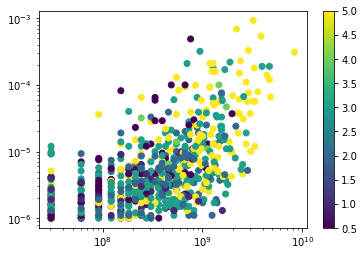

In [212]:
plt.scatter(events.max_area, events.max_flare, c=events.ar_test)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()

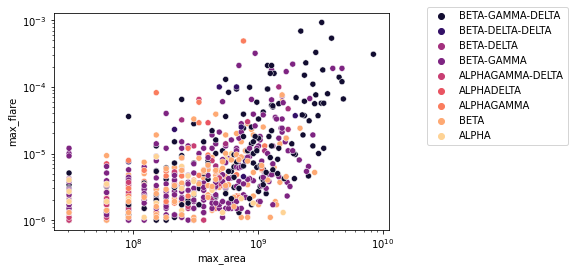

In [236]:
order = ["ALPHA", "BETA", "ALPHAGAMMA", "ALPHADELTA", "ALPHAGAMMA-DELTA", "BETA-DELTA", "BETA-GAMMA", "BETA-DELTA", "BETA-DELTA-DELTA","BETA-GAMMA-DELTA"]

sns.scatterplot(data=events, x="max_area", y="max_flare", hue="ar_class_max", palette="magma", hue_order=order[::-1])
plt.xscale("log")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [156]:
bgd = flare_ar_df[flare_ar_df["ar_mtwilsoncls"].isin(["BETA-GAMMA-DELTA", "BETAAGAMMA-DELTA"])]
alpha = flare_ar_df[flare_ar_df["ar_mtwilsoncls"].isin(["ALPHA"])]
beta = flare_ar_df[flare_ar_df["ar_mtwilsoncls"].isin(["BETA", "BETAA"])]

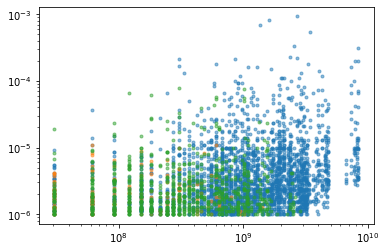

In [151]:
plt.scatter(bgd.area_atdiskcenter, bgd.goes_class_val, marker='.', alpha=0.5)
plt.scatter(alpha.area_atdiskcenter, alpha.goes_class_val, marker='.', alpha=0.5)
plt.scatter(beta.area_atdiskcenter, beta.goes_class_val, marker='.', alpha=0.5)
plt.yscale("log")
plt.xscale("log")

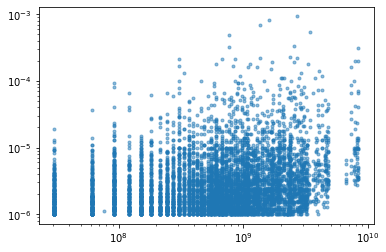

In [144]:
plt.scatter(flare_ar_df.area_atdiskcenter, flare_ar_df.goes_class_val, marker='.', alpha=0.5)
plt.yscale("log")
plt.xscale("log")

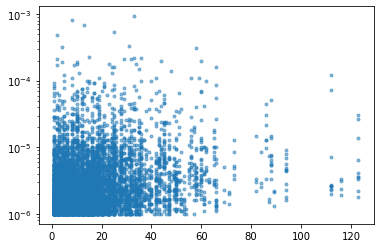

In [143]:
plt.scatter(flare_ar_df.ar_numspots, flare_ar_df.goes_class_val, marker='.', alpha=0.5)
plt.yscale("log")
plt.xscale("log")

In [248]:
tstart = "2010-01-01"
tend = "2010-01-31"

result = Fido.search(a.Time(tstart, tend),
                       a.hek.EventType('AR'),
                       a.hek.FRM.Name == 'NOAA SWPC Observer')


In [250]:
result = result["hek"]

In [251]:
result

gs_thumburl,comment_count,hpc_bbox,meanphotoenergydensity,frm_humanflag,hgc_coord,ar_spotarearepruncert,event_coordsys,obs_levelnum,hpc_coord,event_npixels,gs_imageurl,ar_polarity,totalenergydensityunit,frm_paramset,hrc_coord,event_starttime,ar_mtwilsoncls,event_type,meantwistalpha,intensmin,obs_meanwavel,frm_url,bound_chaincode,totalphotoenergy,noposition,ar_spotarearepr,active,intensmax,frm_versionnumber,ar_pilcurvature,area_uncert,obs_dataprepurl,hpc_geom,hgc_bbox,intensmedian,chaincodetype,obs_channelid,ar_spotareareprunit,event_clippedspatial,ar_noaaclass,SOL_standard,event_avg_rating,eventtype,intensunit,hpc_boundcc,event_mapurl,frm_contact,meanvertcurrentdensity,ar_penumbracls,intensmean,bound_ccstartc1,frm_name,area_atdiskcenter,frm_identifier,obs_observatory,event_description,ar_spotarearaw,unsignedflux,boundbox_c2ur,magfluxunit,highshearareapercent,obs_firstprocessingdate,maxmagfieldstrengthunit,sharp_noaa_ars,boundbox_c2ll,frm_institute,hrc_bbox,refs_orig,meangradienthorz,gwill,ar_mcintoshcls,event_maskurl,bound_ccstartc2,ar_spotarearawunit,gs_movieurl,event_score,event_expires,hrc_boundcc,event_probability,intensvar,frm_daterun,currentdensityunit,highsheararea,event_coordunit,hpc_y,hpc_x,search_instrument,ar_numspots,kb_archivdate,kb_archivist,intenstotal,sum_overlap_scores,unsignedvertcurrent,hgs_boundcc,intensskew,obs_includesnrt,rasterscan,obs_wavelunit,kb_archivid,search_frm_name,meaninclinationgamma,currenthelicityunit,boundbox_c1ur,ar_noaanum,area_atdiskcenteruncert,boundbox_c1ll,absnetcurrenthelicity,meancurrenthelicity,event_importance_num_ratings,highshearareaunit,ar_compactnesscls,currentunit,event_testflag,maxmagfieldstrength,event_c2error,hrc_r,hgs_y,obs_title,hgs_x,hcr_checked,frm_specificid,totalphotoenergydensity,event_title,gwillunit,ar_sumnegsignedflux,obs_instrument,ar_neutrallength,event_c1error,revision,hpc_radius,meanshearangle,event_endtime,ar_spotarearawuncert,meanenergydensityunit,event_importance,meangradienttotal,event_coord2,event_coord3,event_coord1,search_observatory,ar_sumpossignedflux,area_raw,meangradientvert,concept,ar_axislength,event_pixelunit,hgc_boundcc,log_r_value,totalphotoenergyunit,hgc_x,hrc_a,hgc_y,gs_galleryid,twistunit,ar_lengthunit,hgs_coord,ar_zurichcls,bound_ccnsteps,intenskurt,event_clippedtemporal,gradientunit,rasterscantype,search_channelid,unsignedcurrenthelicity,hgs_bbox,area_unit,savncpp,obs_lastprocessingdate,refs [2]
str1,str1,str110,object,str4,str21,object,str12,object,str26,object,str1,object,str1,str3,str41,str19,str5,str2,object,object,float64,str3,str1,object,str5,object,str4,object,object,object,object,str1,str186,str115,object,str1,str7,str1,str1,str1,str30,object,str1,str1,str1,str1,str25,object,str1,object,object,str18,int64,str9,str7,str95,object,object,float64,str1,object,str1,str1,str1,float64,str36,str110,str1,object,object,str3,str1,object,str1,str1,str22,str1,str1,int64,object,str19,str1,object,str7,float64,float64,str3,int64,str19,str8,object,str21,object,str1,object,str1,str1,str2,str82,str4,object,str1,float64,int64,object,float64,object,object,str1,str1,str1,str1,str5,object,float64,float64,int64,str1,int64,str4,str1,object,str1,str1,object,str7,object,float64,str1,str19,object,str19,object,str1,object,object,int64,object,int64,str3,object,object,object,str13,object,str1,str1,object,str1,float64,float64,int64,str1,str1,str1,str14,str1,object,object,str1,str1,str1,str7,object,str95,str3,object,str1,object
,0,"POLYGON((266.8164 -419.7366,351.1356 -421.3686,352.6002 -414.4644,267.9294 -412.8246,266.8164 -419.7366))",None,true,POINT(53.886793 -28),None,UTC-HGS-TOPO,None,POINT(310.0524 -417.0456),None,,None,,N/A,POINT(0.53248454070063 216.628944249683),2010-01-01T00:00:00,BETA,AR,None,None,5e-05,N/A,,None,false,None,true,None,None,None,None,,01030000000100000005000000454772F90FAD7040BDE3141DC93B7AC067D5E76A2BF27540E4141DC9E5557AC0F2B0506B9A09764033C4B12E6EE779C070CE88D2DEBE70408104C58F31CD79C0454772F90FAD7040BDE3141DC93B7AC0,"POLYGON((50.886793 -